# Load the libraries

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Don't forget to turn on plotting display in the notebook.
%matplotlib inline 

# Load the data

In [2]:
boston = datasets.load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']

In [6]:
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
59,0.10328,25.0,5.13,0.0,0.4530,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
488,0.15086,0.0,27.74,0.0,0.6090,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
99,0.06860,0.0,2.89,0.0,0.4450,7.416,62.5,3.4952,2.0,276.0,18.0,396.90,6.19,33.2
237,0.51183,0.0,6.20,0.0,0.5070,7.358,71.6,4.1480,8.0,307.0,17.4,390.07,4.73,31.5
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1
281,0.03705,20.0,3.33,0.0,0.4429,6.968,37.2,5.2447,5.0,216.0,14.9,392.23,4.59,35.4
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
474,8.05579,0.0,18.10,0.0,0.5840,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14,13.8
150,1.65660,0.0,19.58,0.0,0.8710,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5


# Create X (matrix) and y (vector)

In [7]:
features = boston['feature_names']
X = df[features]
y = df['target']

In [8]:
X.shape

(506, 13)

In [9]:
y.shape

(506,)

# NOTE: In ML we always use a training set (to build the model) and a test set (to evaluate the results).  

# Basic model with sklearn

### Create test and training set

In [10]:
len(df)

506

In [11]:
# Split the original dataframe into train and test
df_train = df.sample(400).copy()
df_test = df[~df.index.isin(df_train.index)].copy()

In [12]:
df_train.shape

(400, 14)

In [13]:
df_test.shape

(106, 14)

In [14]:
# Create X_test, y_test, X_train, y_train

X_test = df_test[features]
y_test = df_test['target']

X_train = df_train[features]
y_train = df_train['target']

In [ ]:
# Other approach 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Fit/train the model

In [15]:
lr = linear_model.LinearRegression()

In [16]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Print the coefficients

In [17]:
lr.coef_

array([-1.02957685e-01,  3.84291738e-02, -1.45254981e-03,  2.83044582e+00,
       -1.46780647e+01,  4.74285311e+00, -1.01674047e-02, -1.32891583e+00,
        2.62431874e-01, -1.03424837e-02, -9.22719759e-01,  1.16454696e-02,
       -4.47708893e-01])

In [18]:
 for f, coeff in zip(features,lr.coef_):
        print(f,coeff)

CRIM -0.10295768549746738
ZN 0.038429173750095684
INDUS -0.001452549806738047
CHAS 2.8304458159550863
NOX -14.67806473867519
RM 4.742853106615817
AGE -0.010167404709282403
DIS -1.3289158253288813
RAD 0.2624318744719261
TAX -0.010342483710574595
PTRATIO -0.9227197593441113
B 0.011645469622810553
LSTAT -0.4477088931144548


In [19]:
lr.intercept_

26.46291027908245

In [ ]:
# we can fit the same model with other data
lr.fit(other data)

### Calculate the predictions

In [21]:
y_test_pred = lr.predict(X_test)

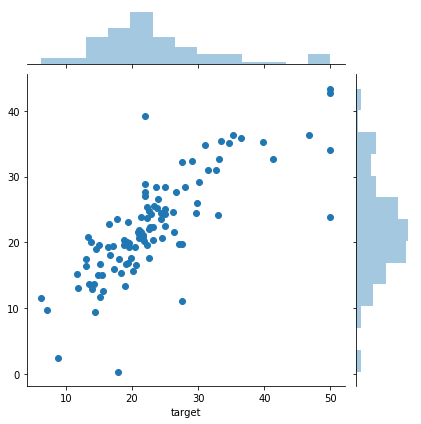

In [22]:
sns.jointplot(y_test, y_test_pred)

In [23]:
# plt.scatter(y_test, 
#               y_test_pred)
# plt.xlim(0,60)
# plt.ylim(0,60)
# plt.plot([0,60],
#          [0,60])
# plt.title('Real vs. Predicted values')
# plt.xlabel('real values')
# plt.ylabel('predicted values')

### Calculate the metrics

In [24]:
r2_score(y_test,y_test_pred)

0.6039567981216669

In [25]:
mean_squared_error(y_test,y_test_pred)

30.110590806188924

#  
#  
#  Basic model with statsmodule
### Sklearn more for prediction, statsmodule more for inference

### Create the model

In [26]:
# NOTE: The variables are now parameters of the model

model = sm.OLS(y_train, X_train)

### Fit the model

In [27]:
# NOTE: the variables are not here!

model = model.fit() 

### Calculate the predictions

In [28]:
y_test_pred = model.predict(X_test)

### Plot the predictions

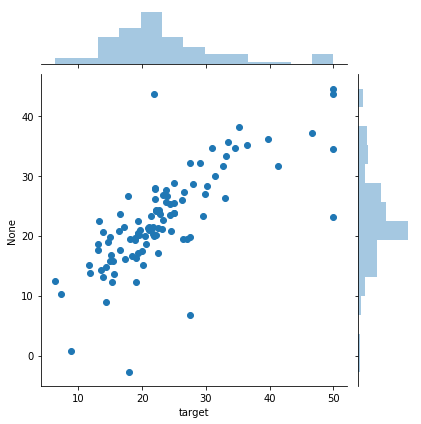

In [29]:
sns.jointplot(y_test, y_test_pred)

### Print the summary

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     790.5
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          2.45e-269
Time:                        08:47:56   Log-Likelihood:                -1179.5
No. Observations:                 400   AIC:                             2385.
Df Residuals:                     387   BIC:                             2437.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0928      0.033     -2.792      0.005      -0.158      -0.027
ZN             0.0387      0.015      2.596      0.010       0.009       0.068
INDUS         -0.0055      0.071     -0.077      0.939      -0.145       0.134
CHAS           3.1704      0.954      3.322      0.001       1.294       5.047
NOX           -4.1953      3.699     -1.134      0.257     -11.468       3.077
RM             6.3455      0.338     18.790      0.000       5.682       7.009
AGE           -0.0163      0.015     -1.104      0.270      -0.045       0.013
DIS           -0.9531      0.206     -4.634      0.000      -1.357      -0.549
RAD            0.1627      0.071      2.281      0.023       0.022       0.303
TAX           -0.0079      0.004     -1.854      0.065      -0.016       0.000
PTRATIO       -0.5323      0.119     -4.463      0.000      -0.767      -0.298
B              0.0156      0.003      5.562      0.000       0.010       0.021
LSTAT         -0.3744      0.055     -6.758      0.000      -0.483      -0.265
==============================================================================
Omnibus:                      197.551   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1649.482
Skew:                           1.922   Prob(JB):                         0.00
Kurtosis:                      12.176   Cond. No.                     8.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model.params

CRIM      -0.092812
ZN         0.038749
INDUS     -0.005475
CHAS       3.170443
NOX       -4.195310
RM         6.345509
AGE       -0.016325
DIS       -0.953093
RAD        0.162651
TAX       -0.007938
PTRATIO   -0.532267
B          0.015572
LSTAT     -0.374443
dtype: float64